<img src="img/scikit-learn-logo.png" width="15%">

# Metodi di regressione con `scikit-learn`

In questo quaderno dimostriamo l'uso della libreria Python **SciKit-Learn** (`sklearn`) per l'applicazione di modelli di regressione di vario tipo. 

In [1]:
# Importiamo le varie librerie
import numpy as np
import pandas as pd         # per leggere il dataset in formato .csv
import matplotlib.pyplot as plt 
%matplotlib inline
import sklearn
import sklearn.linear_model # per la regressione lineare
import sklearn.neighbors    # per la regressione K-Nearest Neighbor
from sklearn.metrics import mean_squared_error, r2_score  # misure di qualità (MSE, coefficiente R²)

## Regressione lineare per il dataset `Advertising`

In [2]:
# Carico il dataset in un oggetto dataframe Pandas (assimilabile ad un ndarray Numpy)
df = pd.read_csv('data/Advertising.csv')

In [3]:
# Visualizzo alcune righe del dataset
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


## Regressione lineare semplice

In [4]:
# Estraiamo le colonne di interesse come dataframe individuali
X = df[['TV']]     # dati di input
y = df[['sales']]  # dati di output
# Verifichiamo le dimensioni delle matrici:
print(X.shape)
print(y.shape)

(200, 1)
(200, 1)


In [5]:
# Costruiamo ed addestriamo un modello di regressione lineare
regr = sklearn.linear_model.LinearRegression() # preparo il modello
regr.fit(X, y); # addestro il modello (ottimizza i parametri)

In [16]:
# Calcoliamo le predizioni del modello sui dati di input
y_pred = regr.predict(X)

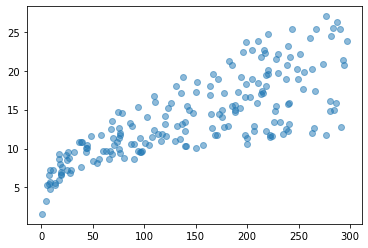

In [28]:
# Grafichiamo i dati originali e l'ipotesi lineare
plt.scatter(X, y, alpha=0.5)
#plt.plot(X, y_pred, color='red', linewidth=3)
plt.show()

In [29]:
# Stampiamo l'intercetta e il coefficiente della regressione
print('Intercetta: \n', regr.intercept_, '\nCoefficienti: \n', regr.coef_)

Intercetta: 
 [7.03259355] 
Coefficienti: 
 [[0.04753664]]


Questo significa che ogni 1000$ in più di pubblicità TV sono associati mediamente con 47.5 unità di prodotto in più vendute. 

Verifichiamo ora la qualità del fit sui dati di addestramento. 

In [30]:
# Stampiamo l'errore quadratico medio
print('Mean squared error (MSE):\n %.3f' % mean_squared_error(y, y_pred))
# Stampiamo la statistica R^2 
print('Coefficiente R^2:\n %.3f' % r2_score(y, y_pred))

Mean squared error (MSE):
 10.513
Coefficiente R^2:
 0.612


Prediciamo le vendite con un budget per la pubblicità televisiva di 100 mila dollari: 

In [32]:
regr.predict([[100]])

array([[11.78625759]])

Per un investimento TV di 100000$ si prevede una vendita media di 11786 unità di prodotto. 

## Separazione di training set e test set

Nei passi precedenti ci eravamo dimenticati che per valutare la qualità del modello occorre separare i dati di addestramento da quelli usati per la valutazione! La funzione _train_test_split()_ fa proprio questo. 

In [75]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2, random_state=42) # Separo in 80% training - 20% test
# Ora costruisco il modello solo con i dati training: 
X_train = train[['TV']]
y_train = train[['sales']]
regr.fit(X_train, y_train)
y_pred_train = regr.predict(X_train)
# Verifico il fit del modello: 
print('Training R^2:\n %.3f' % r2_score(y_train, y_pred_train))
print('Training MSE:\n %.3f' % mean_squared_error(y_train, y_pred_train))
# Valuto invece il modello sui dati di test: 
X_test = test[['TV']]
y_test = test[['sales']]
y_pred_test = regr.predict(X_test)
print('Test R^2:\n %.3f' % r2_score(y_test, y_pred_test))
print('Test MSE:\n %.3f' % mean_squared_error(y_test, y_pred_test))

Training R^2:
 0.591
Training MSE:
 10.604
Test R^2:
 0.677
Test MSE:
 10.205


## Modello basato solo su `radio`

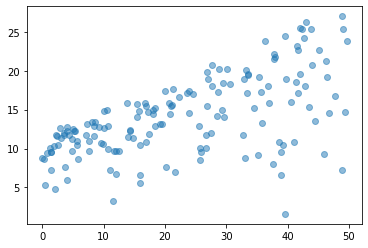

Intercetta: 
 [9.42406565] 
Coefficienti: 
 [[0.20440685]]
Training MSE:
 16.835
Training R^2:
 0.351


In [76]:
# Regressione semplice dell'output 'sales' sulla variabile di input 'radio'
X = train[['radio']]
y = train[['sales']]
regr.fit(X, y)
y_pred = regr.predict(X)
plt.scatter(X, y, alpha=0.5)
#plt.plot(X, y_pred, color='red', linewidth=3)
plt.show()
print('Intercetta: \n', regr.intercept_, '\nCoefficienti: \n', regr.coef_)
print('Training MSE:\n %.3f' % mean_squared_error(y, y_pred))
print('Training R^2:\n %.3f' % r2_score(y, y_pred))


## Modello basato solo su `newspaper`

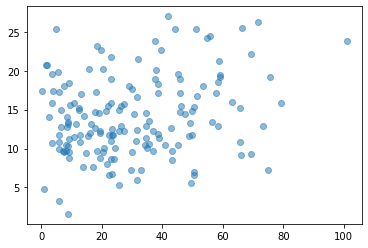

Intercetta: 
 [12.31054833] 
Coefficienti: 
 [[0.0597567]]
Training MSE:
 24.469
Training R^2:
 0.057


In [77]:
# Regressione semplice dell'output 'sales' sulla variabile di input 'newspaper'
X = train[['newspaper']]
y = train[['sales']]
regr.fit(X, y)
y_pred = regr.predict(X)
plt.scatter(X, y, alpha=0.5)
#plt.plot(X, y_pred, color='red', linewidth=3)
plt.show()
print('Intercetta: \n', regr.intercept_, '\nCoefficienti: \n', regr.coef_)
print('Training MSE:\n %.3f' % mean_squared_error(y, y_pred))
print('Training R^2:\n %.3f' % r2_score(y, y_pred))

## Modello basato su `TV` e `radio`
Il modello basato su entrambe le variabili TV e radio ha un fit nettamente migliore: 

In [78]:
# Regressione multipla dell'output 'sales' sulle variabili di input 'TV' e 'radio'
X = train[['TV', 'radio']]
y = train[['sales']]
regr.fit(X, y)
y_pred = regr.predict(X)
print('Intercetta: \n', regr.intercept_, '\nCoefficienti: \n', regr.coef_)
print('Training MSE:\n %.3f' % mean_squared_error(y, y_pred))
print('Training R^2:\n %.3f' % r2_score(y, y_pred))


Intercetta: 
 [3.02825525] 
Coefficienti: 
 [[0.0447283  0.19066726]]
Training MSE:
 2.708
Training R^2:
 0.896


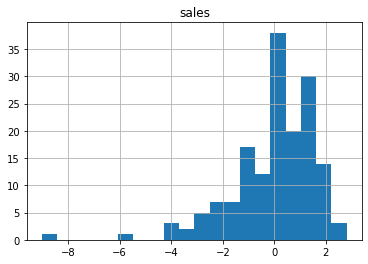

In [79]:
# Distribuzione (istogramma) dei residui y - y_pred
(y - y_pred).hist(bins=20);

In [80]:
# Statistiche sui residui
(y - y_pred).describe().transpose()

,count,mean,std,min,25%,50%,75%,max
sales,160.0,2.869927e-15,1.650703,-9.009989,-0.843442,0.249528,1.116467,2.801969


## Modello completo (3 variabili)
Inserendo tutte e 3 le variabili di input nel modello, il fit non migliora rispetto all'uso solo di TV e radio. 

In [81]:
# Regressione multipla dell'output 'sales' su tutte e tre le variabili di input
X = train[['TV', 'radio', 'newspaper']]
y = train[['sales']]
regr.fit(X, y)
y_pred = regr.predict(X)
print('Intercetta: \n', regr.intercept_, '\nCoefficienti: \n', regr.coef_)
print('Training MSE:\n %.3f' % mean_squared_error(y, y_pred))
print('Training R^2:\n %.3f' % r2_score(y, y_pred))

Intercetta: 
 [2.97906734] 
Coefficienti: 
 [[0.04472952 0.18919505 0.00276111]]
Training MSE:
 2.705
Training R^2:
 0.896


## Aggiunta di una interazione nonlineare (feature crossing)

In [82]:
df2 = df.copy() # copio il dataset per non "sporcare" l'originale
df2['TV x radio'] = df['TV'] * df['radio'] # creo una nuova colonna
train, test = train_test_split(df2, test_size=0.2, random_state=0) # Split 80%-20% 
X_train = train[['TV', 'radio', 'TV x radio']]
y_train = train[['sales']]
X_test = test[['TV', 'radio', 'TV x radio']]
y_test = test[['sales']]
regr.fit(X_train, y_train)
y_pred_train = regr.predict(X_train)
print('Training MSE:\n %.3f' % mean_squared_error(y_train, y_pred_train))
print('Training R^2:\n %.3f' % r2_score(y_train, y_pred_train))
y_pred_test = regr.predict(X_test)
print('Test MSE:\n %.3f' % mean_squared_error(y_test, y_pred_test))

Training MSE:
 0.690
Training R^2:
 0.973
Test MSE:
 1.644


## Regressione polinomiale

In [85]:
# Regressione polinomiale
X = df[['TV']]
y = df[['sales']]
poly_features = sklearn.preprocessing.PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly_features.fit_transform(X)
print(X.iloc[0][0])
print(X_poly[0])

230.1
[2.30100000e+02 5.29460100e+04 1.21828769e+07]


In [103]:
np.shape(X_poly)

(506, 3)

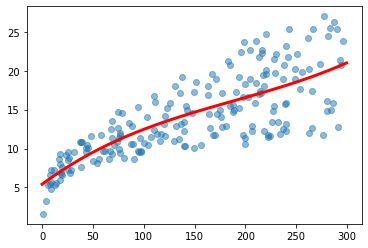

Intercetta: 
 [5.42010655] 
Coefficienti: 
 [[ 9.64341770e-02 -3.15222433e-04  5.57199796e-07]]


In [86]:
regr = sklearn.linear_model.LinearRegression()
regr.fit(X_poly, y);
# Calcoliamo le predizioni sull'intero range da 0.0 a 40.0
y_pred = regr.predict(X_poly)
X_poly_all = poly_features.fit_transform(np.c_[np.arange(0.0, 300.0, 0.5)]) # np.c_ rende il range un array colonna 2D
y_pred_all = regr.predict(X_poly_all)
# Grafichiamo i dati originali e l'ipotesi
plt.scatter(X_poly[:,0], y, alpha=0.5)
plt.plot(X_poly_all[:,0], y_pred_all, color='red', linewidth=3)
plt.show()
print('Intercetta: \n', regr.intercept_, '\nCoefficienti: \n', regr.coef_)

In [24]:
# Stampiamo l'errore quadratico medio
print('Training MSE:\n %.3f' % mean_squared_error(y, y_pred))

Training MSE:
 10.238


## Regressione non parametrica (K-Nearest Neighbors)

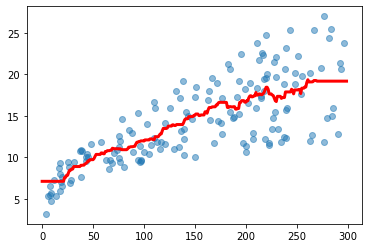

In [87]:
X_train = train[['TV']]
y_train = train[['sales']]
knn = sklearn.neighbors.KNeighborsRegressor(n_neighbors=21) # il parametro K è controllato da n_neighbors
knn.fit(X_train, y_train)
y_pred_train = knn.predict(X_train)
X = np.c_[np.arange(0.0, 300.0, 1.0)]
y_pred = knn.predict(X)
# Grafichiamo i dati originali...
plt.scatter(X_train, y_train, alpha=0.5)
# ...e le predizioni Nearest Neighbor
plt.plot(X, y_pred, color='red', linewidth=3)
plt.show()

In [88]:
print('Training MSE:\n %.3f' % mean_squared_error(y_train, y_pred_train))
X_test = test[['TV']]
y_test = test[['sales']]
y_pred_test = knn.predict(X_test)
print('Test MSE:\n %.3f' % mean_squared_error(y_test, y_pred_test))

Training MSE:
 10.410
Test MSE:
 11.147


## Regressione lineare tramite Stochastic Gradient Descent

In [89]:
X_train = train[['TV', 'radio', 'TV x radio']]
y_train = train['sales']    # notare la parentesi singola: 
                            # SGDRegressor richiede un array 1D di forma (n_samples,), non una matrice
X_test = test[['TV', 'radio', 'TV x radio']]
y_test = test['sales']
from sklearn.pipeline import make_pipeline
sgd = make_pipeline(sklearn.preprocessing.StandardScaler(), # preprocessiamo i dati scalandoli
                    sklearn.linear_model.SGDRegressor(loss='squared_loss', penalty='none', 
                                                      learning_rate='constant', eta0=0.1, max_iter=2000))
sgd.fit(X_train, y_train);
y_pred_train = sgd.predict(X_train)
print('Training R^2:\n %.3f' % r2_score(y_train, y_pred_train))
print('Training MSE:\n %.3f' % mean_squared_error(y_train, y_pred_train))
y_pred_test = sgd.predict(X_test)
print('Test MSE:\n %.3f' % mean_squared_error(y_test, y_pred_test))

Training R^2:
 0.962
Training MSE:
 0.991
Test MSE:
 2.114


## Esercizi: Regressione lineare e polinomiale per il dataset `boston_house_prices`

Carichiamo il dataset `data/boston_house_prices.csv` e grafichiamo uno scatter plot tra la variabile di input `LSTAT` e la variabile di output `MEDV`. 

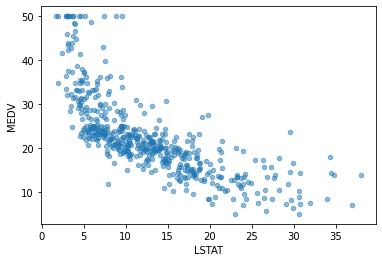

In [90]:
boston = pd.read_csv('data/boston_house_prices.csv')
boston.plot.scatter('LSTAT', 'MEDV', alpha=0.5);

**Esercizio 1**. Utilizzando l'intero dataset come training set, costruire una regressione lineare tra la variabile di input `LSTAT` e la variabile di output `MEDV`. Calcolare l'intercetta e il coefficiente della regressione. Calcolare l'errore quadratico medio ed il coefficiente $R^2$. 

**Esercizio 2**. Utilizzando l'intero dataset come training set, costruire una regressione polinomiale di grado $3$ a partire dalla stessa coppia di variabili (input `LSTAT`, output `MEDV`). Calcolare l'errore quadratico medio così ottenuto.

In [97]:
#train, test = train_test_split(df, test_size=0.2, random_state=42) # Separo in 80% training - 20% test
X = boston[['LSTAT']]
y = boston['MEDV']    # notare la parentesi singola: 
regr = sklearn.linear_model.LinearRegression() # preparo il modello
regr.fit(X, y);


In [100]:
y_pred= regr.predict(X)
print('Intercetta: \n', regr.intercept_, '\nCoefficienti: \n', regr.coef_)
print('Training R^2:\n %.3f' % r2_score(y, y_pred))
print('Training MSE:\n %.3f' % mean_squared_error(y, y_pred))



Intercetta: 
 34.55384087938311 
Coefficienti: 
 [-0.95004935]
Training R^2:
 0.544
Training MSE:
 38.483


4.98
[  4.98      24.8004   123.505992]


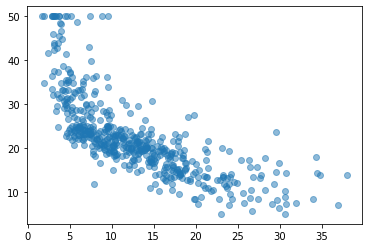

Intercetta: 
 48.64962534157573 
Coefficienti: 
 [-3.86559278e+00  1.48738477e-01 -2.00386767e-03]
Training R^2:
 0.658
Training MSE:
 28.884


In [111]:
poly_features = sklearn.preprocessing.PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly_features.fit_transform(X)
print(X.iloc[0][0])
print(X_poly[0])

regr = sklearn.linear_model.LinearRegression()
regr.fit(X_poly, y);
# Calcoliamo le predizioni sull'intero range da 0.0 a 40.0
y_pred = regr.predict(X_poly)



#X_poly_all = poly_features.fit_transform(np.c_[np.arange(0.0, 300.0, 0.5)]) # np.c_ rende il range un array colonna 2D
#y_pred_all = regr.predict(X_poly_all)
# Grafichiamo i dati originali e l'ipotesi
plt.scatter(X_poly[:,0], y, alpha=0.5)
#plt.plot(X_poly[:,0], y, color='red', linewidth=3)
plt.show()
print('Intercetta: \n', regr.intercept_, '\nCoefficienti: \n', regr.coef_)
print('Training R^2:\n %.3f' % r2_score(y, y_pred))
print('Training MSE:\n %.3f' % mean_squared_error(y, y_pred))

